In [1]:
import pandas as pd
import numpy as np
import datetime

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
merged1 = pd.read_csv('new_data/merged_clean.csv', index_col=0)
print(merged1.shape)
merged2 = pd.read_csv('new_data/merged_clean_2.csv', index_col=0)
print(merged2.shape)
merged = merged1.append(merged2)
print(merged.shape)

(271100, 21)
(207447, 21)
(478547, 21)


/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/3283179314.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  merged = merged1.append(merged2)


In [3]:
#drop duplicates
merged.drop_duplicates(inplace=True)

#drop all na
merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'Distance:'], how='all', inplace=True)
#merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'Distance:'], how='all', inplace=True)
merged.reset_index(inplace=True, drop=True)
merged.shape

(388692, 21)

In [4]:
merged.columns

Index(['name', 'year', 'type', 'date', 'result', 'gc', 'icon', 'race_ref',
       'race_name', 'race_detail', 'race_rank', 'distance', 'points',
       'Avg. speed winner:', 'Distance:', 'Parcours type:', 'ProfileScore:',
       'Vert. meters:', 'Startlist quality score:', 'Won how: ',
       'adjusted_points'],
      dtype='object')

In [30]:
merged['ProfileScore:'].value_counts()

13.000000     9104
12.000000     7000
14.000000     5973
11.000000     5631
17.000000     3894
              ... 
29.111111        4
538.000000       4
289.000000       1
259.000000       1
335.000000       1
Name: ProfileScore:, Length: 393, dtype: int64

In [6]:
#set date as datetime
merged['date'] = pd.to_datetime(merged['date'])

### Vertical meters

In [7]:
no_na = merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'distance'], how='any')

In [8]:
# profile score via vert and distance
X  = no_na[['Distance:', 'ProfileScore:']]
y = no_na['Vert. meters:']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeRegressor()

tree.fit(X_train_scaled, y_train)

tree.score(X_test_scaled, y_test)

0.9997351557955321

In [9]:
vert_na = merged[merged['Vert. meters:'].isna()]
vert_na.dropna(subset=['Distance:', 'ProfileScore:'], how='any', inplace=True)

X_pred = vert_na[['Distance:', 'ProfileScore:']]

X_pred_scaled = scaler.transform(X_pred)

vert_na['predicted_vert'] = tree.predict(X_pred_scaled)
vert_na

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/1125638154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vert_na.dropna(subset=['Distance:', 'ProfileScore:'], how='any', inplace=True)
/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/1125638154.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vert_na['predicted_vert'] = tree.predict(X_pred_scaled)


,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,points,Avg. speed winner:,Distance:,Parcours type:,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points,predicted_vert
5605,richard-carapaz,2020,etappe,2020-08-09,0,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,0.0,41.57,188.0,p2,45.0,NaN,663,Sprint of large group,0.0,1346.0
5606,luke-rowe,2020,etappe,2020-08-09,109,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,0.0,41.57,188.0,p2,45.0,NaN,663,Sprint of large group,0.0,1346.0
5607,maximilian-schachmann,2020,etappe,2020-08-09,24,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,0.0,41.57,188.0,p2,45.0,NaN,663,Sprint of large group,0.0,1346.0
5608,dries-devenyns,2020,etappe,2020-08-09,77,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,0.0,41.57,188.0,p2,45.0,NaN,663,Sprint of large group,0.0,1346.0
5609,rudy-molard,2020,etappe,2020-08-09,50,NaN,stage,race/tour-de-pologne/2020/stage-5,tour-de-pologne,Stage 5 - Zakopane › Kraków,...,0.0,41.57,188.0,p2,45.0,NaN,663,Sprint of large group,0.0,1346.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280443,ivan-basso,2013,etappe,2013-04-19,17,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,8.0,38.23,166.8,p5,329.0,NaN,420,? - let us know!,1105440.0,4634.0
280444,leopold-konig,2013,etappe,2013-04-19,20,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,2.0,38.23,166.8,p5,329.0,NaN,420,? - let us know!,276360.0,4634.0
280445,jan-barta,2013,etappe,2013-04-19,58,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,0.0,38.23,166.8,p5,329.0,NaN,420,? - let us know!,0.0,4634.0
280446,david-de-la-cruz,2013,etappe,2013-04-19,24,NaN,stage,race/tour-of-the-alps/2013/stage-4,tour-of-the-alps,Stage 4 - Arco › Sega di Ala,...,0.0,38.23,166.8,p5,329.0,NaN,420,? - let us know!,0.0,4634.0


In [10]:
merged.loc[vert_na.index, 'Vert. meters:'] = vert_na['predicted_vert']

### Decision tree for profile score

In [11]:
#drop where either profile score or vert meters are missing
no_na = merged.dropna(subset=['ProfileScore:', 'Vert. meters:'], how='any')
print(no_na.shape)

#drop where score below 10 -> arbitrary point
no_na = no_na[no_na['ProfileScore:'] > 10]
print(no_na.shape)

(257974, 21)
(220014, 21)


In [12]:
# profile score via vert and distance
X  = no_na[['Distance:', 'Vert. meters:']]
y = no_na['ProfileScore:']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

tree = DecisionTreeRegressor()

tree.fit(X_train_scaled, y_train)

tree.score(X_test_scaled, y_test)

0.999951389752339

In [13]:
profile_na = merged[merged['ProfileScore:'].isna()]
smaller_ten = merged[merged['ProfileScore:'] <= 10]
impute_profile = profile_na.append(smaller_ten)
impute_profile.dropna(subset=['Distance:', 'Vert. meters:'], how='any', inplace=True)

X_pred = impute_profile[['Distance:', 'Vert. meters:']]

X_pred_scaled = scaler.transform(X_pred)

impute_profile['predicted_score'] = tree.predict(X_pred_scaled)
impute_profile

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/821046524.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  impute_profile = profile_na.append(smaller_ten)


,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,points,Avg. speed winner:,Distance:,Parcours type:,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points,predicted_score
3648,egan-bernal,2020,etappe,2020-08-01,6,8.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,30.0,41.35,189.5,p2,NaN,2346.0,496,? - let us know!,NaN,49.0
3649,andrey-amador,2020,etappe,2020-08-01,77,77.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,0.0,41.35,189.5,p2,NaN,2346.0,496,? - let us know!,NaN,49.0
3650,jonathan-castroviejo,2020,etappe,2020-08-01,75,75.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,0.0,41.35,189.5,p2,NaN,2346.0,496,? - let us know!,NaN,49.0
3651,pavel-sivakov,2020,etappe,2020-08-01,40,41.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,0.0,41.35,189.5,p2,NaN,2346.0,496,? - let us know!,NaN,49.0
3652,dylan-van-baarle,2020,etappe,2020-08-01,81,81.0,stage,race/la-route-d-occitanie/2020/stage-1,la-route-d-occitanie,Stage 1 - Saint-Affrique › Cazouls-lès-Béziers,...,0.0,41.35,189.5,p2,NaN,2346.0,496,? - let us know!,NaN,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380923,marcos-garcia,2010,etappe,2010-08-28,12,79.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,18.0,55.32,13.0,p1,0.0,33.0,1132,Time Trial,0.0,13.0
380924,vladimir-isaychev,2010,etappe,2010-08-28,12,75.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,18.0,55.32,13.0,p1,0.0,33.0,1132,Time Trial,0.0,13.0
380925,serafin-martinez,2010,etappe,2010-08-28,12,80.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,18.0,55.32,13.0,p1,0.0,33.0,1132,Time Trial,0.0,13.0
380926,gonzalo-rabunal-rios,2010,etappe,2010-08-28,12,81.0,chrono,race/vuelta-a-espana/2010/stage-1,vuelta-a-espana,Stage 1 (TTT) - Sevilla › Sevilla,...,18.0,55.32,13.0,p1,0.0,33.0,1132,Time Trial,0.0,13.0


In [14]:
merged.loc[impute_profile.index, 'ProfileScore:'] = impute_profile['predicted_score']

### KNN to impute parcours type

In [15]:
merged['Parcours type:'].value_counts()

p2    103706
p1     84824
p0     70583
p5     56511
p3     45573
p4     27495
Name: Parcours type:, dtype: int64

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)

px0 = merged[merged['Parcours type:']!='p0']

px0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)

X = px0[['ProfileScore:', 'Vert. meters:']]

y = px0['Parcours type:']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)

knn.score(X_test_scaled, y_test)


/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/977234109.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  px0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)


0.992589609343536

In [17]:
p0 = merged[merged['Parcours type:']=='p0']

p0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)

X_pred = p0[['ProfileScore:', 'Vert. meters:']]

X_pred_scaled = scaler.transform(X_pred)

labels = knn.predict(X_pred_scaled)

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/1480808305.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p0.dropna(subset = ['ProfileScore:', 'Vert. meters:'], how='any', inplace=True)


In [18]:
p0['adjusted parcours type'] = labels

/var/folders/3l/70h6qcrd72q0j5x4sscw7qn40000gn/T/ipykernel_9542/2894937052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p0['adjusted parcours type'] = labels


In [19]:
p0['adjusted parcours type'].value_counts()

p2    4671
p3    3198
p1    2661
p5    1161
p4    1012
Name: adjusted parcours type, dtype: int64

In [20]:
merged.loc[p0.index, 'Parcours type:'] = p0['adjusted parcours type']

In [21]:
merged['Parcours type:'].value_counts()

p2    108377
p1     87485
p0     57880
p5     57672
p3     48771
p4     28507
Name: Parcours type:, dtype: int64

In [22]:
merged.groupby('Parcours type:')[['Vert. meters:', 'ProfileScore:']].mean()

,Vert. meters:,ProfileScore:
Parcours type:,,
p0,NaN,NaN
p1,793.010439,25.371081
p2,2176.758425,86.535122
p3,2367.709159,110.532929
p4,3316.564598,182.654260
p5,3562.890991,279.793265


In [23]:
parcours = {
    'p1' : 'fl',
    'p2' : 'hi_fl',
    'p3' : 'hi_hi',
    'p4' : 'mo_fl',
    'p5' : 'mo_mo'
}

merged['Parcours type:'] = merged['Parcours type:'].map(parcours)

In [24]:
merged.dropna(subset=['ProfileScore:', 'Vert. meters:', 'distance'], how='any', inplace=True)
merged.shape

(261001, 21)

In [25]:
merged.to_csv('merged_treated.csv')

In [195]:
merged[merged['race_name'] == 'tour-de-france'].sort_values(by='year')

,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,distance,points,Avg. speed winner:,Distance:,Parcours type:,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points
364586,frank-schleck,2010,etappe,2010-07-03,76,79.0,chrono,race/tour-de-france/2010/prologue,tour-de-france,Prologue - Rotterdam › Rotterdam,...,0.025987,0.0,53.400,8.9,fl,0.005693,0.006197,0.896247,Time Trial,0.0
363412,stephen-cummings,2010,etappe,2010-07-17,138,142.0,stage,race/tour-de-france/2010/stage-13,tour-de-france,Stage 13 - Rodez › Revel,...,0.641447,0.0,44.139,196.0,hi_fl,0.092979,0.311716,0.896247,7.3 km solo,0.0
363413,robbie-mcewen,2010,etappe,2010-07-17,137,164.0,stage,race/tour-de-france/2010/stage-13,tour-de-france,Stage 13 - Rodez › Revel,...,0.641447,0.0,44.139,196.0,hi_fl,0.092979,0.311716,0.896247,7.3 km solo,0.0
363414,linus-gerdemann,2010,etappe,2010-07-17,70,69.0,stage,race/tour-de-france/2010/stage-13,tour-de-france,Stage 13 - Rodez › Revel,...,0.641447,0.0,44.139,196.0,hi_fl,0.092979,0.311716,0.896247,7.3 km solo,0.0
363415,luke-roberts-1,2010,etappe,2010-07-17,125,108.0,stage,race/tour-de-france/2010/stage-13,tour-de-france,Stage 13 - Rodez › Revel,...,0.641447,0.0,44.139,196.0,hi_fl,0.092979,0.311716,0.896247,7.3 km solo,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250211,kobe-goossens,2022,etappe,2022-07-10,39,63.0,stage,race/tour-de-france/2022/stage-9,tour-de-france,Stage 9 - Aigle › Châtel les portes du Soleil,...,0.631250,0.0,40.377,192.9,hi_hi,0.402277,0.539415,0.855408,60.5 km solo,0.0
250212,louis-meintjes,2022,etappe,2022-07-10,23,17.0,stage,race/tour-de-france/2022/stage-9,tour-de-france,Stage 9 - Aigle › Châtel les portes du Soleil,...,0.631250,0.0,40.377,192.9,hi_hi,0.402277,0.539415,0.855408,60.5 km solo,0.0
250213,andrea-pasqualon,2022,etappe,2022-07-10,82,52.0,stage,race/tour-de-france/2022/stage-9,tour-de-france,Stage 9 - Aigle › Châtel les portes du Soleil,...,0.631250,0.0,40.377,192.9,hi_hi,0.402277,0.539415,0.855408,60.5 km solo,0.0
250207,andreas-leknessund,2022,etappe,2022-07-10,69,42.0,stage,race/tour-de-france/2022/stage-9,tour-de-france,Stage 9 - Aigle › Châtel les portes du Soleil,...,0.631250,0.0,40.377,192.9,hi_hi,0.402277,0.539415,0.855408,60.5 km solo,0.0


In [265]:
merged[merged['name'] == 'nairo-quintana']

,name,year,type,date,result,gc,icon,race_ref,race_name,race_detail,...,distance,points,Avg. speed winner:,Distance:,Parcours type:,ProfileScore:,Vert. meters:,Startlist quality score:,Won how:,adjusted_points
57,nairo-quintana,2020,etappe,2020-09-16,46,15.0,stage,race/tour-de-france/2020/stage-17,tour-de-france,Stage 17 - Grenoble › Méribel - Col de la Loze,...,0.555921,0.0,35.280,170.00,mo_mo,0.821632,0.638421,0.929912,3.5 km solo,0.0
212,nairo-quintana,2020,etappe,2020-09-15,36,10.0,stage,race/tour-de-france/2020/stage-16,tour-de-france,Stage 16 - La Tour-du-Pin › Villard-de-Lans,...,0.536184,0.0,38.910,164.00,mo_mo,0.453510,0.562473,0.929912,25 km solo,0.0
369,nairo-quintana,2020,etappe,2020-09-13,18,9.0,stage,race/tour-de-france/2020/stage-15,tour-de-france,Stage 15 - Lyon › Grand Colombier,...,0.570724,6.0,38.180,174.50,mo_mo,0.719165,0.536677,0.929912,Sprint a deux,3942900.0
528,nairo-quintana,2020,etappe,2020-09-12,34,5.0,stage,race/tour-de-france/2020/stage-14,tour-de-france,Stage 14 - Clermont-Ferrand › Lyon,...,0.634868,0.0,43.410,194.00,mo_fl,0.117647,0.381323,0.929912,3 km solo,0.0
687,nairo-quintana,2020,etappe,2020-09-11,21,5.0,stage,race/tour-de-france/2020/stage-13,tour-de-france,Stage 13 - Châtel-Guyon › Pas de Peyrol (Le Pu...,...,0.626645,0.0,38.070,191.50,mo_mo,0.552182,0.642600,0.929912,0.1 km solo,0.0
847,nairo-quintana,2020,etappe,2020-09-10,47,5.0,stage,race/tour-de-france/2020/stage-12,tour-de-france,Stage 12 - Chauvigny › Sarran,...,0.713816,0.0,42.360,218.00,hi_hi,0.248577,0.488399,0.929912,28 km solo,0.0
1009,nairo-quintana,2020,etappe,2020-09-09,29,5.0,stage,race/tour-de-france/2020/stage-11,tour-de-france,Stage 11 - Châtelaillon-Plage › Poitiers,...,0.544408,0.0,41.620,166.50,fl,0.003795,0.145266,0.929912,Sprint of large group,0.0
1173,nairo-quintana,2020,etappe,2020-09-08,31,5.0,stage,race/tour-de-france/2020/stage-10,tour-de-france,Stage 10 - île d'Oléron (Le Château-d'Oléron) ...,...,0.550987,0.0,46.940,168.50,fl,0.013283,0.076524,0.929912,Sprint of large group,0.0
1339,nairo-quintana,2020,etappe,2020-09-06,11,5.0,stage,race/tour-de-france/2020/stage-9,tour-de-france,Stage 9 - Pau › Laruns,...,0.500000,20.0,39.020,153.00,mo_fl,0.432638,0.504395,0.929912,Sprint of small group,8054300.0
1508,nairo-quintana,2020,etappe,2020-09-05,17,6.0,stage,race/tour-de-france/2020/stage-8,tour-de-france,Stage 8 - Cazères › Loudenvielle,...,0.460526,8.0,34.930,141.00,mo_fl,0.538899,0.550656,0.929912,35 km solo,3976600.0


In [94]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

minmax.fit(merged[['distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']])

merged[['distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']] = minmax.transform(merged[['distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']])

### Test split data

In [310]:
vuelta_riders = merged[(merged['race_name']=='tour-de-france')| (merged['race_name']=='vuelta-a-espana')| (merged['race_name']=='giro-d-italia')][['name', 'year', 'race_name']]
vuelta_riders = vuelta_riders[vuelta_riders['year'] != 2022].drop_duplicates().reset_index(drop=True)
vuelta_riders = vuelta_riders.values
vuelta_riders

array([['egan-bernal', 2020, 'tour-de-france'],
       ['andrey-amador', 2020, 'tour-de-france'],
       ['richard-carapaz', 2020, 'tour-de-france'],
       ...,
       ['ben-swift', 2010, 'vuelta-a-espana'],
       ['mickael-buffaz', 2010, 'vuelta-a-espana'],
       ['arkaitz-duran', 2010, 'vuelta-a-espana']], dtype=object)

In [333]:
def get_sequence(df, name, year, tour, weeks=52):
    
    #get tour data
    if year != 2010:
        tour_data = df[(df['name'] == name) & (df['year'] == year) & (df['race_name'] == tour)].sort_values(by='date')
        y = tour_data[['date', 'points']].set_index('date')
        X_decoder = tour_data[['date', 'distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']].set_index('date')
        
        season_data = df[(df['name'] == name) & (df['date'] < min(tour_data['date'])) & (df['date'] >= min(tour_data['date']) - datetime.timedelta(weeks=weeks))].sort_values(by='date')
        X_encoder = season_data[['date', 'points', 'distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']].set_index('date')
        
    return X_encoder, X_decoder, y

In [202]:
def get_sequences_2(df, name, year, tour):
    
    #get tour data
    predict_data_filter = df[(df['name'] == name) & (df['year'] == year) & (df['race_name'] == tour)]
    train_data_filter = df[(df['name'] == name) & (df['date'] < min(predict_data_filter['date'])) & (df['date'] >= min(predict_data_filter['date']) - datetime.timedelta(weeks=52))]
    merged = pd.concat([predict_data_filter, train_data_filter]).sort_values(by='date')

    X =  merged[['date', 'distance', 'ProfileScore:', 'Vert. meters:', 'Startlist quality score:']].set_index('date')
    y = merged[['date', 'points']].set_index('date')
    
    return X, y

In [354]:
from keras.preprocessing.sequence import pad_sequences

def get_sequences(maxlen):
    
    X_encoder_ls = []
    X_decoder_ls = []
    y_ls = []

    for rider, year, tour in vuelta_riders:
        
        if year != 2010:
            
            X_encoder, X_decoder, y = get_sequence(merged, rider, year, tour)
            
            X_encoder = pad_sequences(X_encoder.to_numpy().T, maxlen=maxlen, dtype='float', padding='pre', value=-1000.).T
            X_decoder = pad_sequences(X_decoder.to_numpy().T, maxlen=21, dtype='float', padding='post', value=-1000.).T
            X_decoder = pad_sequences(X_decoder.T, maxlen=maxlen, dtype='float', padding='pre', value=-1000.).T
            
            y = pad_sequences(y.to_numpy().T, maxlen=21, dtype='float', padding='post', value=-1000.).T
            y = pad_sequences(y.T, maxlen=maxlen, dtype='float', padding='pre', value=-1000.).T
                
            X_encoder_ls.append(X_encoder)
            X_decoder_ls.append(X_decoder)
            y_ls.append(y)
            
            print(rider, year, X_encoder.shape, X_decoder.shape, y.shape)
    
    return np.array(X_encoder_ls), np.array(X_decoder_ls), np.array(y_ls)


In [357]:
X_encoder_ls, X_decoder_ls, y_ls = get_sequences(70)

egan-bernal 2020 (70, 5) (70, 4) (70, 1)
andrey-amador 2020 (70, 5) (70, 4) (70, 1)
richard-carapaz 2020 (70, 5) (70, 4) (70, 1)
jonathan-castroviejo 2020 (70, 5) (70, 4) (70, 1)
michal-kwiatkowski 2020 (70, 5) (70, 4) (70, 1)
luke-rowe 2020 (70, 5) (70, 4) (70, 1)
pavel-sivakov 2020 (70, 5) (70, 4) (70, 1)
dylan-van-baarle 2020 (70, 5) (70, 4) (70, 1)
primoz-roglic 2020 (70, 5) (70, 4) (70, 1)
george-bennett 2020 (70, 5) (70, 4) (70, 1)
amund-grondahl-jansen 2020 (70, 5) (70, 4) (70, 1)
tom-dumoulin 2020 (70, 5) (70, 4) (70, 1)
robert-gesink 2020 (70, 5) (70, 4) (70, 1)
sepp-kuss 2020 (70, 5) (70, 4) (70, 1)
tony-martin 2020 (70, 5) (70, 4) (70, 1)
wout-van-aert 2020 (70, 5) (70, 4) (70, 1)
peter-sagan 2020 (70, 5) (70, 4) (70, 1)
emanuel-buchmann 2020 (70, 5) (70, 4) (70, 1)
felix-grossschartner 2020 (70, 5) (70, 4) (70, 1)
lennard-kamna 2020 (70, 5) (70, 4) (70, 1)
daniel-oss 2020 (70, 5) (70, 4) (70, 1)
lukas-postlberger 2020 (70, 5) (70, 4) (70, 1)
maximilian-schachmann 2020 (70, 

In [359]:
import torch

torch.save(X_encoder_ls, 'torch_data/X_encoder_ls.pt')
torch.save(X_decoder_ls, 'torch_data/X_decoder_ls.pt')
torch.save(y_ls, 'torch_data/y_ls.pt')


In [137]:
X2 = []
y2 = []

for xx, yy in zip(X, y):
    if xx.shape == (4,0):
        pass
    else:
        X2.append(xx)
        y2.append(yy)
    

In [187]:
X2[0].shape, y2[0].shape

((51, 4), (51, 1))

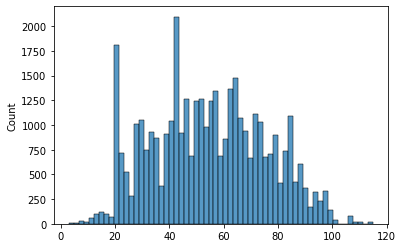

In [107]:
import seaborn as sns
sns.histplot([x.shape[0] for x in X2]);

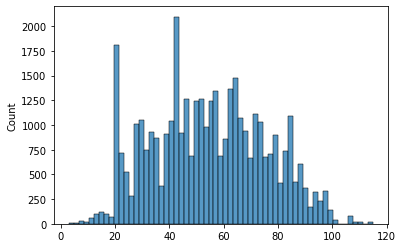

In [108]:
sns.histplot([y.shape[0] for y in y2]);

In [141]:
from keras.preprocessing.sequence import pad_sequences

In [207]:
X3 = []
y3 = []

for xx in X2:
    X3.append(pad_sequences(xx.T, maxlen=80, dtype='float', padding='post', value=-1000., truncating='pre').T)
    
for yy in y2:
    y3.append(pad_sequences(yy.T, maxlen=80, dtype='float', padding='post', value=-1000., truncating='pre').T)

In [208]:
y3[0].shape

(80, 1)

In [224]:
pad_sequences(X[0].T, maxlen=60).T.shape

(60, 4)

In [242]:
X3 = []
y3 = []

for x in X:
    X3.append(pad_sequences(x.T, maxlen=80, dtype='float', padding='post', value=-1000).T)
    
for y in y:
    y3.append(pad_sequences(y.T, maxlen=80, dtype='float', padding='post', value=-1000).T)
    
X3 = np.array(X3)
y3 = np.array(y3)

X3.shape, y3.shape

((2210, 80, 4), (2210, 80, 1))

In [243]:
X_tour_pad = []
y_tour_pad = []

for xx in X_tour:
    X_tour_pad.append(pad_sequences(xx.T, maxlen=80, dtype='float', padding='pre', value=-1000.).T)
    
for yy in y_tour:
    y_tour_pad.append(pad_sequences(yy.T, maxlen=80, dtype='float', padding='pre', value=-1000.).T)
    
X_tour_pad = np.array(X_tour_pad)
y_tour_pad = np.array(y_tour_pad)

X_tour_pad.shape, y_tour_pad.shape

((2210, 80, 4), (2210, 80, 1))

In [244]:
torch.save(X3, 'torch_data/X_tdf_2022.pt')
torch.save(y3, 'torch_data/y_tdf_2022.pt')

torch.save(X_tour_pad, 'torch_data/X_tour_tdf_2022.pt')
torch.save(y_tour_pad, 'torch_data/y_tour_tdf_2022.pt')

In [157]:
X3[0].T.shape

(80, 51)

In [192]:
torch.save(X3, 'torch_data/X_full_scaled.pt')
torch.save(y3, 'torch_data/y_full_scaled.pt')

